In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Alexa3Reviews.csv")

In [3]:
df.drop(columns = ['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
df.head()

,title,text,rating,date
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019


## Distribuicao das Avaliacoes

Number of rows per star rating:
5    3475
4     818
3     304
1     233
2     150
Name: rating, dtype: int64


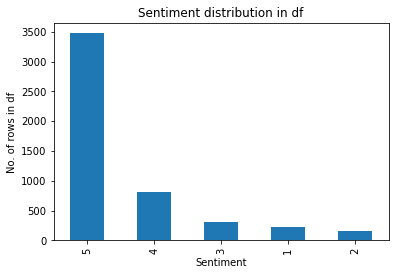

In [5]:
import matplotlib.pyplot as plt 

print("Number of rows per star rating:")
print(df['rating'].value_counts())

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['rating']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

## Tokenizacao

In [6]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install PyStemmer

  Using cached PyStemmer-2.0.1.tar.gz (559 kB)
  Running setup.py clean for PyStemmer
Failed to build PyStemmer
    Running setup.py install for PyStemmer: started
    Running setup.py install for PyStemmer: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'A:\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Tuby Neto\\AppData\\Local\\Temp\\pip-install-rfxawbgp\\pystemmer_6964043acff64aeca8439acc1676b864\\setup.py'"'"'; __file__='"'"'C:\\Users\\Tuby Neto\\AppData\\Local\\Temp\\pip-install-rfxawbgp\\pystemmer_6964043acff64aeca8439acc1676b864\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Tuby Neto\AppData\Local\Temp\pip-wheel-lt13tpk2'
       cwd: C:\Users\Tuby Neto\AppData\Local\Temp\pip-install-rfxawbgp\pystemmer_6964043acff64aeca8439acc1676b864\
  Complete output (8 lines):
  running bdist_wheel
  running build
  running build_ext
  cythoning src/Stemmer.pyx to src\Stemmer.c
  A:\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_leve

In [9]:
import spacy
from collections import Counter
from spacy.tokenizer import Tokenizer
from spacy.lang.pt import Portuguese

# É necessário instalar o pacote da lingua portuguesa no prompt do anaconda

nlp = Portuguese()
tokenizer = nlp.tokenizer
text_token = []

for line in df['text']: 
    tokens = tokenizer(line)
    text_token.append(list(tokens))
    
df["text_token"] = text_token

In [10]:
df.head()

,title,text,rating,date,text_token
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"[Sobre, o, produto, :, visual, muito, bonito, ..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"[O, dispositivo, possui, 4, microfones, direci..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"[Comprei, o, Alexa, Echo, Dot, (, terceira, ge..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"[Ainda, estou, me, adaptando, com, o, Echo, Do..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"[Acho, que, a, propaganda, desse, produto, est..."


## Stemming

In [11]:
import spacy, nltk
import nltk
from nltk.stem.porter import *
from nltk.stem import RSLPStemmer


stemmer = RSLPStemmer()

stem_token_text = []

for doc in text_token:
    stem_list = []
    for tkn in doc:
        stem = stemmer.stem(str(tkn))
        stem_list.append(stem)
    stem_token_text.append(stem_list)
df['Stem_teken_text'] = stem_token_text

In [12]:
df.head()

,title,text,rating,date,text_token,Stem_teken_text
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"[Sobre, o, produto, :, visual, muito, bonito, ...","[sobr, o, produt, :, visual, muit, bonit, e, b..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"[O, dispositivo, possui, 4, microfones, direci...","[o, disposi, possu, 4, microfon, direc, do, to..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"[Comprei, o, Alexa, Echo, Dot, (, terceira, ge...","[compr, o, alex, ech, dot, (, terc, ger, ), as..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"[Ainda, estou, me, adaptando, com, o, Echo, Do...","[aind, est, me, adapt, com, o, ech, dot, ., fi..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"[Acho, que, a, propaganda, desse, produto, est...","[ach, que, a, propagand, dess, produt, est, se..."


## Bag Of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
for i in range(len(df["Stem_teken_text"])):
    df["Stem_teken_text"][i] = ", ".join([str(item) for item in df["Stem_teken_text"][i]])

df["Stem_teken_text"]

for i in range(len(df["text_token"])):
    df["text_token"][i] = ", ".join([str(item) for item in df["text_token"][i]])

df["text_token"]

<ipython-input-14-6ac7513d89a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Stem_teken_text"][i] = ", ".join([str(item) for item in df["Stem_teken_text"][i]])
<ipython-input-14-6ac7513d89a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_token"][i] = ", ".join([str(item) for item in df["text_token"][i]])


0       Sobre, o, produto, :, visual, muito, bonito, e...
1       O, dispositivo, possui, 4, microfones, direcio...
2       Comprei, o, Alexa, Echo, Dot, (, terceira, ger...
3       Ainda, estou, me, adaptando, com, o, Echo, Dot...
4       Acho, que, a, propaganda, desse, produto, está...
                              ...                        
4975    Quería, muito, uma, caixa, de, som, para, ouvi...
4976    Muito, bom, ,, melhor, ainda, do, que, eu, pen...
4977    O, que, mais, gostei, ,, é, a, qualidade, de, ...
4978    Muito, boa, ,, reconhece, muito, bem, a, voz, ...
4979    Ótimo, produto, ,, desperta, ,, acende, a, lâm...
Name: text_token, Length: 4980, dtype: object

In [15]:
df.head()

,title,text,rating,date,text_token,Stem_teken_text
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"Sobre, o, produto, :, visual, muito, bonito, e...","sobr, o, produt, :, visual, muit, bonit, e, be..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"O, dispositivo, possui, 4, microfones, direcio...","o, disposi, possu, 4, microfon, direc, do, top..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"Comprei, o, Alexa, Echo, Dot, (, terceira, ger...","compr, o, alex, ech, dot, (, terc, ger, ), ass..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"Ainda, estou, me, adaptando, com, o, Echo, Dot...","aind, est, me, adapt, com, o, ech, dot, ., fiz..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"Acho, que, a, propaganda, desse, produto, está...","ach, que, a, propagand, dess, produt, est, sen..."


# Com Stemming

In [16]:
reviewsTexts = list(df["Stem_teken_text"])
countVectorizer = CountVectorizer(binary=True, ngram_range = (1,1))
bowTransformer = countVectorizer.fit(reviewsTexts)
reviewsTexts = bowTransformer.transform(reviewsTexts)

reviewsTexts

<4980x6422 sparse matrix of type '<class 'numpy.int64'>'
	with 217762 stored elements in Compressed Sparse Row format>

## Divisao da Base em Treino e Teste

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviewsTexts, df['rating'], test_size=0.3)

## Random Forest

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np 

scores = ['f1_micro']

parameters = {
     'n_estimators': list(range(50, 351, 50)),
     'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV( RandomForestClassifier(), 
                            parameters,
                            n_jobs = -1,    
                            scoring = scores,
                            cv = 5,
                            refit = 'f1_micro', 
                            verbose=3
)

grid_search.fit(X_train, y_train)
grid_search.cv_results_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'mean_fit_time': array([ 3.30205321,  6.71390777,  9.47268014, 12.47578883, 15.10138898,
        20.55891547, 29.24189572,  4.37630992,  8.04925199, 11.47303128,
        11.99137325, 15.57357421, 22.59526939, 20.03773284]),
 'std_fit_time': array([0.21408367, 0.45013937, 0.5501417 , 0.57496657, 0.27340829,
        2.73222569, 2.51284929, 0.42352395, 1.20739893, 1.03451076,
        0.73215071, 0.7744524 , 1.11529363, 3.38956361]),
 'mean_score_time': array([0.04339976, 0.08852673, 0.11799974, 0.16011963, 0.29620099,
        0.30822072, 0.47963247, 0.07243671, 0.09884377, 0.13592591,
        0.15801182, 0.23023229, 0.26262221, 0.17410274]),
 'std_score_time': array([0.00637479, 0.01023326, 0.0098183 , 0.03066687, 0.06031751,
        0.03482097, 0.10106873, 0.02417488, 0.03239706, 0.04684141,
        0.02809088, 0.05920389, 0.03055755, 0.03412116]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'en

## Melhores Parametros

In [19]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 150}

## Testando o Modelo com os Parametros Otimizados

In [20]:

randomForest = RandomForestClassifier(criterion= grid_search.best_params_['criterion'], n_estimators = grid_search.best_params_['n_estimators']).fit(X_train, y_train)

## Metricas Obtidas sobre a Base de Teste

In [21]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, randomForest.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.01      0.03        70
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        92
           4       0.25      0.00      0.01       259
           5       0.69      1.00      0.82      1027

    accuracy                           0.69      1494
   macro avg       0.39      0.20      0.17      1494
weighted avg       0.56      0.69      0.56      1494



A:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
f1_score(y_test, randomForest.predict(X_test), average='micro')

0.6880856760374833

# Sem Stemming

In [23]:
reviewsTexts = list(df["text_token"])
countVectorizer = CountVectorizer(binary=True, ngram_range = (1,1))
bowTransformer = countVectorizer.fit(reviewsTexts)
reviewsTexts = bowTransformer.transform(reviewsTexts)

reviewsTexts

<4980x12202 sparse matrix of type '<class 'numpy.int64'>'
	with 227068 stored elements in Compressed Sparse Row format>

## Divisao da Base em Treino e Teste

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviewsTexts, df['rating'], test_size=0.3)

## Random Forest

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np 

scores = ['f1_micro']

parameters = {
     'n_estimators': list(range(50, 351, 50)),
     'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV( RandomForestClassifier(), 
                            parameters,
                            n_jobs = -1,    
                            scoring = scores,
                            cv = 5,
                            refit = 'f1_micro', 
                            verbose=3
)

grid_search.fit(X_train, y_train)
grid_search.cv_results_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


{'mean_fit_time': array([ 4.69450574,  9.51673446, 14.65537262, 20.80579209, 23.68739629,
        26.97079587, 28.67561607,  3.98779831,  8.01560507, 12.08940802,
        16.82657065, 21.21430144, 24.83658624, 22.22296638]),
 'std_fit_time': array([0.66159318, 0.9969162 , 1.45880546, 1.97655028, 2.13791398,
        2.06556238, 1.08272811, 0.11728232, 0.57183612, 0.46044183,
        0.94043143, 1.01175757, 1.26646964, 3.01397713]),
 'mean_score_time': array([0.05400314, 0.10402412, 0.16263962, 0.34154363, 0.26473923,
        0.27057695, 0.40024724, 0.05130363, 0.07621307, 0.13905244,
        0.21345186, 0.25130949, 0.26391172, 0.17441001]),
 'std_score_time': array([0.01494216, 0.015167  , 0.02763673, 0.10258723, 0.03974841,
        0.02653048, 0.12885425, 0.00829291, 0.00847498, 0.02440334,
        0.05344013, 0.0537712 , 0.0345126 , 0.02621997]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'en

## Melhores Parametros

In [26]:
grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 200}

## Testando o Modelo com os Parametros Otimizados

In [27]:

randomForest = RandomForestClassifier(criterion= grid_search.best_params_['criterion'], n_estimators = grid_search.best_params_['n_estimators']).fit(X_train, y_train)

## Metricas Obtidas sobre a Base de Teste

In [28]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, randomForest.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.03      0.06        63
           2       0.00      0.00      0.00        60
           3       0.00      0.00      0.00        99
           4       0.33      0.00      0.01       230
           5       0.70      1.00      0.82      1042

    accuracy                           0.70      1494
   macro avg       0.41      0.21      0.18      1494
weighted avg       0.58      0.70      0.58      1494



A:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
A:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
f1_score(y_test, randomForest.predict(X_test), average='micro')

0.6987951807228916

Apos a execucao sem e com stemming, obteve-se um f1-score ligeiramente melhor com o stemming.

# Aplicacao da CNN

 ## Consultando o Vocabulario

In [30]:
df["Stem_teken_text"]

0       sobr, o, produt, :, visual, muit, bonit, e, be...
1       o, disposi, possu, 4, microfon, direc, do, top...
2       compr, o, alex, ech, dot, (, terc, ger, ), ass...
3       aind, est, me, adapt, com, o, ech, dot, ., fiz...
4       ach, que, a, propagand, dess, produt, est, sen...
                              ...                        
4975    querí, muit, uma, caix, de, som, par, ouv, min...
4976    muit, bom, ,, melhor, aind, do, que, eu, pens,...
4977    o, que, mais, gost, ,, é, a, qual, de, áudi, ,...
4978    muit, boa, ,, reconhec, muit, bem, a, voz, ,, ...
4979    ótim, produt, ,, despert, ,, acend, a, lâmp, ,...
Name: Stem_teken_text, Length: 4980, dtype: object

In [32]:
import collections
word_count = Counter()
for token in list(df['Stem_teken_text']): 
    word_count[token] += 1

word_count
vocabSize = len(word_count)

print("O tamanho do vocabulário é: ", vocabSize)

O tamanho do vocabulário é:  4979


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer



vocab_size = vocabSize
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['Stem_teken_text'])

In [34]:
df["text_to_sequence"] = tokenizer.texts_to_sequences(df['Stem_teken_text'])

In [35]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Padding

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 100
padding_type = "post"
trunction_type="post"
text_to_sequence_padded = pad_sequences(df["text_to_sequence"], maxlen=max_length, padding=padding_type,
                       truncating=trunction_type)
df["text_to_sequence_padded"] = list(text_to_sequence_padded)

In [37]:
df.head()

,title,text,rating,date,text_token,Stem_teken_text,text_to_sequence,text_to_sequence_padded
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"Sobre, o, produto, :, visual, muito, bonito, e...","sobr, o, produt, :, visual, muit, bonit, e, be...","[178, 5, 26, 862, 11, 346, 4, 30, 185, 616, 14...","[178, 5, 26, 862, 11, 346, 4, 30, 185, 616, 14..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"O, dispositivo, possui, 4, microfones, direcio...","o, disposi, possu, 4, microfon, direc, do, top...","[5, 74, 199, 250, 201, 1993, 12, 529, 470, 62,...","[5, 74, 199, 250, 201, 1993, 12, 529, 470, 62,..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"Comprei, o, Alexa, Echo, Dot, (, terceira, ger...","compr, o, alex, ech, dot, (, terc, ger, ), ass...","[24, 5, 18, 32, 49, 721, 167, 203, 6, 292, 160...","[24, 5, 18, 32, 49, 721, 167, 203, 6, 292, 160..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"Ainda, estou, me, adaptando, com, o, Echo, Dot...","aind, est, me, adapt, com, o, ech, dot, ., fiz...","[47, 21, 42, 540, 7, 5, 32, 49, 274, 2, 334, 1...","[47, 21, 42, 540, 7, 5, 32, 49, 274, 2, 334, 1..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"Acho, que, a, propaganda, desse, produto, está...","ach, que, a, propagand, dess, produt, est, sen...","[82, 6, 2, 963, 366, 26, 21, 231, 422, 3, 237,...","[82, 6, 2, 963, 366, 26, 21, 231, 422, 3, 237,..."


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_to_sequence_padded'] , df['rating'], test_size=0.3)

## Word Embeddings

In [39]:
def is_float(s):
    try:
        float(s)  
        return True
    except ValueError:
        return False


embeddings_index = {}

f = open('glove_s100.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    
    coefs = []
    for coef in values[1:]:
        if (is_float(coef)):
            coefs.append(coef)
    
    coefs = np.asarray(coefs, dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 929593 word vectors.


In [40]:
embedding_dict = {}

for i, word in enumerate(list(word_count.keys())):
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None):
        embedding_dict[word] = embedding_vector
    else:
        embedding_dict[word] = np.zeros(100)

In [41]:
embedding_matrix = np.zeros((len(word_count) + 1, 100))


for i, word in enumerate(list(word_count.keys())):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector[:100]

In [42]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Criando a Camada de Embedding

In [43]:
import tensorflow
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(input_dim=len(word_count) + 1,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=100,
                            trainable=False) 

In [44]:
from tensorflow.keras import *
from tensorflow.keras.layers import *

model = Sequential([
    embedding_layer,
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='softmax')
])

In [47]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [50]:
df

,title,text,rating,date,text_token,Stem_teken_text,text_to_sequence,text_to_sequence_padded
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,5,9 de outubro de 2019,"Sobre, o, produto, :, visual, muito, bonito, e...","sobr, o, produt, :, visual, muit, bonit, e, be...","[178, 5, 26, 862, 11, 346, 4, 30, 185, 616, 14...","[178, 5, 26, 862, 11, 346, 4, 30, 185, 616, 14..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,1,8 de outubro de 2019,"O, dispositivo, possui, 4, microfones, direcio...","o, disposi, possu, 4, microfon, direc, do, top...","[5, 74, 199, 250, 201, 1993, 12, 529, 470, 62,...","[5, 74, 199, 250, 201, 1993, 12, 529, 470, 62,..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,5,8 de outubro de 2019,"Comprei, o, Alexa, Echo, Dot, (, terceira, ger...","compr, o, alex, ech, dot, (, terc, ger, ), ass...","[24, 5, 18, 32, 49, 721, 167, 203, 6, 292, 160...","[24, 5, 18, 32, 49, 721, 167, 203, 6, 292, 160..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,5,13 de novembro de 2019,"Ainda, estou, me, adaptando, com, o, Echo, Dot...","aind, est, me, adapt, com, o, ech, dot, ., fiz...","[47, 21, 42, 540, 7, 5, 32, 49, 274, 2, 334, 1...","[47, 21, 42, 540, 7, 5, 32, 49, 274, 2, 334, 1..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,1,23 de outubro de 2019,"Acho, que, a, propaganda, desse, produto, está...","ach, que, a, propagand, dess, produt, est, sen...","[82, 6, 2, 963, 366, 26, 21, 231, 422, 3, 237,...","[82, 6, 2, 963, 366, 26, 21, 231, 422, 3, 237,..."
...,...,...,...,...,...,...,...,...
4975,MELHOR COMPRA DA MINHA VIDA,Quería muito uma caixa de som para ouvir minha...,5,25 de novembro de 2020,"Quería, muito, uma, caixa, de, som, para, ouvi...","querí, muit, uma, caix, de, som, par, ouv, min...","[1, 11, 15, 76, 3, 19, 10, 73, 33, 103, 185, 2...","[1, 11, 15, 76, 3, 19, 10, 73, 33, 103, 185, 2..."
4976,SUPIMPA!!!!,"Muito bom, melhor ainda do que eu pense, apena...",5,1 de dezembro de 2020,"Muito, bom, ,, melhor, ainda, do, que, eu, pen...","muit, bom, ,, melhor, aind, do, que, eu, pens,...","[11, 48, 50, 47, 12, 6, 35, 242, 140, 126, 43,...","[11, 48, 50, 47, 12, 6, 35, 242, 140, 126, 43,..."
4977,A melhor,"O que mais gostei, é a qualidade de áudio, vol...",5,17 de junho de 2021,"O, que, mais, gostei, ,, é, a, qualidade, de, ...","o, que, mais, gost, ,, é, a, qual, de, áudi, ,...","[5, 6, 23, 61, 8, 2, 34, 3, 225, 119, 84, 9, 1...","[5, 6, 23, 61, 8, 2, 34, 3, 225, 119, 84, 9, 1..."
4978,A Alexa compensa muito comprar.,"Muito boa, reconhece muito bem a voz , o volum...",5,12 de agosto de 2020,"Muito, boa, ,, reconhece, muito, bem, a, voz, ...","muit, boa, ,, reconhec, muit, bem, a, voz, ,, ...","[11, 77, 45, 11, 30, 2, 31, 5, 119, 8, 11, 48,...","[11, 77, 45, 11, 30, 2, 31, 5, 119, 8, 11, 48,..."


In [51]:
newRatings = []

for rating in df["rating"]:
    if rating==1 or rating==2 or rating==3:
        newRatings.append(0)
    else:
        newRatings.append(1)
        
df["rating"] = newRatings

In [52]:
df

,title,text,rating,date,text_token,Stem_teken_text,text_to_sequence,text_to_sequence_padded
0,Excelente custo benefício,Sobre o produto: visual muito bonito e bem aca...,1,9 de outubro de 2019,"Sobre, o, produto, :, visual, muito, bonito, e...","sobr, o, produt, :, visual, muit, bonit, e, be...","[178, 5, 26, 862, 11, 346, 4, 30, 185, 616, 14...","[178, 5, 26, 862, 11, 346, 4, 30, 185, 616, 14..."
1,Péssimo início - defeito ao tirar da caixa,O dispositivo possui 4 microfones direcionais ...,0,8 de outubro de 2019,"O, dispositivo, possui, 4, microfones, direcio...","o, disposi, possu, 4, microfon, direc, do, top...","[5, 74, 199, 250, 201, 1993, 12, 529, 470, 62,...","[5, 74, 199, 250, 201, 1993, 12, 529, 470, 62,..."
2,Excelente produto!,Comprei o Alexa Echo Dot (terceira geração) as...,1,8 de outubro de 2019,"Comprei, o, Alexa, Echo, Dot, (, terceira, ger...","compr, o, alex, ech, dot, (, terc, ger, ), ass...","[24, 5, 18, 32, 49, 721, 167, 203, 6, 292, 160...","[24, 5, 18, 32, 49, 721, 167, 203, 6, 292, 160..."
3,Muito Satisfeito,Ainda estou me adaptando com o Echo Dot.Fiz a ...,1,13 de novembro de 2019,"Ainda, estou, me, adaptando, com, o, Echo, Dot...","aind, est, me, adapt, com, o, ech, dot, ., fiz...","[47, 21, 42, 540, 7, 5, 32, 49, 274, 2, 334, 1...","[47, 21, 42, 540, 7, 5, 32, 49, 274, 2, 334, 1..."
4,Decepção é o meu sentimento.,Acho que a propaganda desse produto está sendo...,0,23 de outubro de 2019,"Acho, que, a, propaganda, desse, produto, está...","ach, que, a, propagand, dess, produt, est, sen...","[82, 6, 2, 963, 366, 26, 21, 231, 422, 3, 237,...","[82, 6, 2, 963, 366, 26, 21, 231, 422, 3, 237,..."
...,...,...,...,...,...,...,...,...
4975,MELHOR COMPRA DA MINHA VIDA,Quería muito uma caixa de som para ouvir minha...,1,25 de novembro de 2020,"Quería, muito, uma, caixa, de, som, para, ouvi...","querí, muit, uma, caix, de, som, par, ouv, min...","[1, 11, 15, 76, 3, 19, 10, 73, 33, 103, 185, 2...","[1, 11, 15, 76, 3, 19, 10, 73, 33, 103, 185, 2..."
4976,SUPIMPA!!!!,"Muito bom, melhor ainda do que eu pense, apena...",1,1 de dezembro de 2020,"Muito, bom, ,, melhor, ainda, do, que, eu, pen...","muit, bom, ,, melhor, aind, do, que, eu, pens,...","[11, 48, 50, 47, 12, 6, 35, 242, 140, 126, 43,...","[11, 48, 50, 47, 12, 6, 35, 242, 140, 126, 43,..."
4977,A melhor,"O que mais gostei, é a qualidade de áudio, vol...",1,17 de junho de 2021,"O, que, mais, gostei, ,, é, a, qualidade, de, ...","o, que, mais, gost, ,, é, a, qual, de, áudi, ,...","[5, 6, 23, 61, 8, 2, 34, 3, 225, 119, 84, 9, 1...","[5, 6, 23, 61, 8, 2, 34, 3, 225, 119, 84, 9, 1..."
4978,A Alexa compensa muito comprar.,"Muito boa, reconhece muito bem a voz , o volum...",1,12 de agosto de 2020,"Muito, boa, ,, reconhece, muito, bem, a, voz, ...","muit, boa, ,, reconhec, muit, bem, a, voz, ,, ...","[11, 77, 45, 11, 30, 2, 31, 5, 119, 8, 11, 48,...","[11, 77, 45, 11, 30, 2, 31, 5, 119, 8, 11, 48,..."


## Divisao da Base em Treino e Teste

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text_to_sequence_padded'], df['rating'], test_size=0.3)

In [54]:
X_train

3982    [18, 263, 225, 71, 555, 156, 117, 210, 12, 306...
3219    [5, 747, 3, 97, 16, 18, 21, 70, 214, 44, 50, 2...
1414    [1719, 82, 13, 888, 2, 18, 9, 65, 304, 327, 3,...
2893    [61, 11, 8, 223, 4, 310, 236, 310, 6, 666, 907...
1063    [54, 13, 655, 6, 21, 81, 5, 58, 55, 32, 49, 4,...
                              ...                        
4586    [2, 18, 8, 425, 181, 1184, 85, 5, 379, 412, 10...
1839    [35, 188, 65, 2, 18, 154, 9, 8, 23, 200, 10, 5...
4885    [5, 26, 42, 163, 244, 11, 161, 3, 114, 4, 81, ...
3830    [721, 167, 113, 11, 30, 33, 237, 3, 131, 2, 18...
781     [21, 167, 8, 13, 71, 1024, 343, 69, 16, 167, 2...
Name: text_to_sequence_padded, Length: 3486, dtype: object

In [55]:
X_test

389     [64, 110, 82, 6, 2, 50, 6, 27, 20, 174, 307, 2...
2817    [5, 289, 3, 729, 3, 31, 585, 11, 10, 114, 25, ...
2574    [59, 78, 47, 608, 60, 5, 612, 3, 142, 16, 18, ...
2491    [5, 26, 8, 48, 487, 25, 33, 2123, 19, 125, 12,...
508     [24, 15, 76, 3, 19, 4, 682, 15, 71, 110, 2, 34...
                              ...                        
118     [27, 52, 89, 6, 1208, 209, 302, 15, 18, 4, 116...
4852    [71, 26, 4, 590, 1305, 17, 381, 2, 298, 12, 12...
2422    [5, 45, 3, 31, 21, 11, 48, 22, 25, 169, 63, 16...
3586    [3, 289, 191, 2, 18, 8, 11, 48, 3, 237, 1371, ...
2040    [61, 14, 8, 11, 164, 127, 7, 171, 2, 1018, 2, ...
Name: text_to_sequence_padded, Length: 1494, dtype: object

In [56]:
X_train_tensor = np.zeros((len(X_train), 100))

for i in range (len(X_train)):
    X_train_tensor[i] = X_train.iloc[i]

In [57]:
X_train_tensor.shape

(3486, 100)

In [58]:
X_test_tensor = np.zeros((len(X_test), 100))

for i in range (len(X_test)):
    X_test_tensor[i] = X_test.iloc[i]

In [59]:
X_test_tensor.shape

(1494, 100)

In [60]:
y_train = np.stack(y_train, axis=0)  
y_test = np.stack(y_test, axis=0)  

In [61]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

In [62]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [65]:
history = model.fit(X_train_tensor, y_train, epochs=10, validation_data=(X_test_tensor, y_test))

Epoch 1/10
109/109 [==============================] - 2s 19ms/step - loss: 0.4361 - accuracy: 0.8652 - val_loss: 0.4445 - val_accuracy: 0.8548
Epoch 2/10
109/109 [==============================] - 2s 20ms/step - loss: 0.4298 - accuracy: 0.8652 - val_loss: 0.4391 - val_accuracy: 0.8548
Epoch 3/10
109/109 [==============================] - 2s 19ms/step - loss: 0.4243 - accuracy: 0.8652 - val_loss: 0.4347 - val_accuracy: 0.8548
Epoch 4/10
109/109 [==============================] - 2s 18ms/step - loss: 0.4196 - accuracy: 0.8652 - val_loss: 0.4308 - val_accuracy: 0.8548
Epoch 5/10
109/109 [==============================] - 2s 18ms/step - loss: 0.4155 - accuracy: 0.8652 - val_loss: 0.4276 - val_accuracy: 0.8548
Epoch 6/10
109/109 [==============================] - 2s 21ms/step - loss: 0.4121 - accuracy: 0.8652 - val_loss: 0.4249 - val_accuracy: 0.8548
Epoch 7/10
109/109 [==============================] - 2s 19ms/step - loss: 0.4092 - accuracy: 0.8652 - val_loss: 0.4226 - val_accuracy: 0.8548

In [66]:
loss, accuracy = model.evaluate(X_test_tensor,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

47/47 [==============================] - 0s 6ms/step - loss: 0.4182 - accuracy: 0.8548
Testing Accuracy is 85.47523617744446 


## Tunning de Parametros

In [67]:
def model_to_optimize(num_filters, kernel_size):
    model = Sequential([
      embedding_layer,
      Conv1D(num_filters, kernel_size, activation='relu'),
      GlobalMaxPooling1D(),
      Dense(10, activation='relu'),
      Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [68]:
params = {
    "num_filters":[32, 64, 128, 256],
    "kernel_size":[3, 5, 7, 9],
}

In [69]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=model_to_optimize,
                        epochs=10,
                        batch_size=10,
                        verbose=False
)

<ipython-input-69-39d8cf6483ae>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_to_optimize,


In [70]:
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=model, param_grid=params,
                              cv=5, verbose=1)
search_result = gridSearch.fit(X_train_tensor, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [71]:
test_accuracy = gridSearch.score(X_test_tensor, y_test)

In [72]:
test_accuracy

0.8547523617744446

In [73]:
gridSearch.best_params_

{'kernel_size': 3, 'num_filters': 32}

In [74]:
pd.DataFrame(gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel_size,param_num_filters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.027215,1.868864,0.480526,0.315906,3,32,"{'kernel_size': 3, 'num_filters': 32}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
1,12.410204,0.413697,0.316568,0.022203,3,64,"{'kernel_size': 3, 'num_filters': 64}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
2,15.884871,0.815737,0.362912,0.031326,3,128,"{'kernel_size': 3, 'num_filters': 128}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
3,21.627373,2.855343,0.421252,0.044966,3,256,"{'kernel_size': 3, 'num_filters': 256}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
4,16.850416,2.763449,0.397019,0.094121,5,32,"{'kernel_size': 5, 'num_filters': 32}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
5,20.707111,2.420253,0.458015,0.036305,5,64,"{'kernel_size': 5, 'num_filters': 64}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
6,22.250828,0.832170,0.445916,0.034098,5,128,"{'kernel_size': 5, 'num_filters': 128}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
7,29.514875,0.950564,0.468897,0.008381,5,256,"{'kernel_size': 5, 'num_filters': 256}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
8,18.719642,1.708706,0.403449,0.100202,7,32,"{'kernel_size': 7, 'num_filters': 32}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1
9,22.950542,1.086251,0.412990,0.022494,7,64,"{'kernel_size': 7, 'num_filters': 64}",0.872493,0.878049,0.860832,0.853659,0.860832,0.865173,0.008828,1


In [75]:
from sklearn.metrics import *

In [76]:
print("F1 Score: {}".format(f1_score(y_test,gridSearch.predict(X_test_tensor))))

F1 Score: 0.9216889209671598


In [77]:
print("Recall Score: {}".format(recall_score(y_test,gridSearch.predict(X_test_tensor))))

Recall Score: 1.0


In [78]:
print("Precision score: {}".format(precision_score(y_test,gridSearch.predict(X_test_tensor))))

Precision score: 0.8547523427041499


In [79]:
model2 = Sequential()



model2.add(embedding_layer)

model2.add(LSTM(100, input_shape=(100,), activation='tanh'))

model2.add(Dense(200, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(100, activation = "relu"))
model2.add(Dropout(0.3))
model2.add(Dense(50, activation = "relu"))

model2.add(Dense(10, activation='sigmoid'))
model2.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          498000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_164 (Dense)           (None, 200)               20200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_165 (Dense)           (None, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_166 (Dense)           (None, 50)              

In [80]:
model2.compile(
 optimizer = "adam",
 loss = "sparse_categorical_crossentropy",
 metrics = ["accuracy"]
)

In [81]:
results = model2.fit(
 X_train_tensor, y_train,
 epochs= 10,
 batch_size = 10,
 validation_data = (X_test_tensor, y_test)
)

Epoch 1/10
349/349 [==============================] - 22s 58ms/step - loss: 2.0452 - accuracy: 0.8635 - val_loss: 1.8030 - val_accuracy: 0.8548
Epoch 2/10
349/349 [==============================] - 17s 48ms/step - loss: 1.5894 - accuracy: 0.8652 - val_loss: 1.4000 - val_accuracy: 0.8548
Epoch 3/10
349/349 [==============================] - 14s 41ms/step - loss: 1.2336 - accuracy: 0.8652 - val_loss: 1.0984 - val_accuracy: 0.8548
Epoch 4/10
349/349 [==============================] - 14s 41ms/step - loss: 0.9759 - accuracy: 0.8652 - val_loss: 0.8890 - val_accuracy: 0.8548
Epoch 5/10
349/349 [==============================] - 13s 39ms/step - loss: 0.8008 - accuracy: 0.8652 - val_loss: 0.7500 - val_accuracy: 0.8548
Epoch 6/10
349/349 [==============================] - 13s 36ms/step - loss: 0.6852 - accuracy: 0.8652 - val_loss: 0.6587 - val_accuracy: 0.8548
Epoch 7/10
349/349 [==============================] - 13s 37ms/step - loss: 0.6088 - accuracy: 0.8652 - val_loss: 0.5981 - val_accuracy:

In [82]:
loss, accuracy = model2.evaluate(X_test_tensor,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

47/47 [==============================] - 1s 21ms/step - loss: 0.5060 - accuracy: 0.8548
Testing Accuracy is 85.47523617744446 


## Tunning de Parametros

In [174]:
def model_to_optimize_lstm(units):
    model = Sequential([
      embedding_layer,
      LSTM(units, input_shape=(100,), activation='tanh'),
      Dense(200, activation='relu'),
      Dropout(0.3),
      Dense(100, activation = "relu"),
      Dropout(0.3),
      Dense(50, activation = "relu"),
      Dense(1, activation='sigmoid')
      ])
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [175]:
params2 = {
    "units": [100, 200, 300],
}

In [176]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model2 = KerasClassifier(build_fn=model_to_optimize_lstm,
                        epochs=10,
                        batch_size=10,
                        verbose=False
)

C:\Users\ton2\AppData\Local\Temp/ipykernel_19484/2677964288.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=model_to_optimize_lstm,


In [177]:
from sklearn.model_selection import GridSearchCV

gridSearch2 = GridSearchCV(estimator=model2, param_grid=params2,
                              cv=5, verbose=1)
search_result = gridSearch2.fit(X_train_tensor, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [178]:
test_accuracy = gridSearch2.score(X_test_tensor, y_test)

In [179]:
test_accuracy

0.8253012299537659

In [180]:
gridSearch2.best_params_

{'units': 100}

In [181]:
pd.DataFrame(gridSearch2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_units,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,81.920205,5.259111,0.868319,0.011761,100,{'units': 100},0.856734,0.857963,0.843615,0.849354,0.882353,0.858004,0.013239,1
1,121.457892,4.642684,1.370703,0.082183,200,{'units': 200},0.861032,0.862267,0.833572,0.849354,0.870875,0.855420,0.012894,3
2,237.851348,3.911870,2.059389,0.080144,300,{'units': 300},0.838109,0.859397,0.847920,0.839311,0.893831,0.855714,0.020524,2


In [182]:
print("F1 Score: {}".format(f1_score(y_test,gridSearch2.predict(X_test_tensor))))

F1 Score: 0.9032258064516129


In [183]:
print("Recall Score: {}".format(recall_score(y_test,gridSearch2.predict(X_test_tensor))))

Recall Score: 0.9636075949367089


In [184]:
print("Precision score: {}".format(precision_score(y_test,gridSearch2.predict(X_test_tensor))))

Precision score: 0.8499651081646895
